# Gender Pay Gap

Team members: 
* Jordan Farrell 
* Julio Oliveira 
* Ashwath Ramesh 
* Satoshi Taniguchi 
* Junjun Tao 
* William Teodecki 

In [1]:
import pandas as pd

from fitter import Fitter

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
psid = pd.read_csv('../data/external/PanelStudyIncomeDynamics.csv')

In [3]:
psid.head()

,intnum68,pernum68,wave,sex,intnum,farminc,region,famwgt,relhead,age,employed,sch,annhrs,annlabinc,occ,ind,white,black,hisp,othrace,degree,degupd,schupd,annwks,unjob,usualhrwk,labincbus,yrsexp,yrsftexp,yrsptexp,yrsptexpsq,yrsftexpsq,yrsExpSq,yrsexpfz,yrsftexpfz,yrsptexpfz,yrsexpfzsq,yrsftexpfzsq,yrsptexpfzsq,wtrgov,...,miningconstruction,durables,nondurables,Transport,Utilities,Communications,retailtrade,wholesaletrade,finance,SocArtOther,hotelsrestaurants,Medical,Education,professional,publicadmin,sumind,manager,business,financialop,computer,architect,scientist,socialworker,postseceduc,legaleduc,artist,lawyerphysician,healthcare,healthsupport,protective,foodcare,building,sales,officeadmin,farmer,constructextractinstall,production,transport,sumocc,LEHS
0,1152,24,1981,1,3505,0.0,1.0,17.000,10,34,1,16.0,1600,10000.0,492,707,1,0,0,0,1.0,1.0,17,32.000000,0,50.0,0,12.0,12.0,0.0,0.0,144.0,144.0,12.0,12.0,0.0,144.0,144.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,5057,171,1981,1,675,0.0,2.0,2.000,10,32,1,14.0,520,9095.0,874,357,0,1,0,0,0.0,0.0,14,13.000000,1,40.0,0,14.0,11.0,3.0,9.0,121.0,196.0,14.0,11.0,3.0,196.0,121.0,9.0,0.0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1
2,6375,170,2009,1,8505,0.0,1.0,6.565,10,64,1,12.0,2550,45200.0,830,907,0,1,0,0,0.0,0.0,12,51.000000,0,50.0,0,39.0,38.0,1.0,1.0,1444.0,1521.0,39.0,38.0,1.0,1521.0,1444.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1
3,2261,3,1999,1,4202,0.0,2.0,25.973,10,50,1,12.0,3072,25000.0,913,448,1,0,0,0,0.0,0.0,12,51.200001,0,60.0,0,30.0,30.0,0.0,0.0,900.0,900.0,30.0,30.0,0.0,900.0,900.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
4,5927,7,1990,1,605,0.0,3.0,14.819,10,26,1,12.0,2100,24500.0,770,157,1,0,0,0,0.0,0.0,12,50.000000,0,42.0,0,8.0,8.0,0.0,0.0,64.0,64.0,8.0,8.0,0.0,64.0,64.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1


In [4]:
psid.shape

(33398, 274)

### Income Columns

In [10]:
income_cols = ['farminc','annlabinc','labincbus', 'annhrs','hrwage']
psid[income_cols].describe()

,farminc,annlabinc,labincbus,annhrs,hrwage
count,33398.000000,3.339800e+04,33398.000000,33398.000000,33398.000000
mean,104.879544,3.708689e+04,168.051859,1990.103449,18.418722
std,2662.001098,4.156487e+04,2257.977695,623.592732,19.462814
min,-5000.000000,3.000000e+01,0.000000,10.000000,0.891473
25%,0.000000,1.600000e+04,0.000000,1767.000000,8.823529
50%,0.000000,2.900000e+04,0.000000,2000.000000,14.423077
75%,0.000000,4.600000e+04,0.000000,2277.000000,22.373541
max,200000.000000,1.500000e+06,99999.000000,5840.000000,1000.000000


Looking into anomalous values in income we were able to find the farm incomes can be negative.

In [11]:
psid[psid['farminc'] != 0][income_cols].describe()

,farminc,annlabinc,labincbus,annhrs,hrwage
count,120.000000,120.000000,120.000000,120.000000,120.000000
mean,29189.725000,24491.858333,114.133333,1860.741667,12.721140
std,33654.453819,18135.461596,933.531183,668.718635,7.682096
min,-5000.000000,400.000000,0.000000,129.000000,2.334267
25%,7000.000000,10748.750000,0.000000,1470.000000,7.179206
50%,20000.000000,21000.000000,0.000000,2000.000000,10.971956
75%,40250.000000,33325.000000,0.000000,2173.250000,16.811773
max,200000.000000,101400.000000,10000.000000,3491.000000,41.666668


100% of the dataset has annual labor income greater than 0.

In [12]:
psid[psid.annlabinc > 0].shape[0] / psid.shape[0] 

1.0

### Categorical columns

In [15]:
category_cols = ['sex','region','white', 'black','hisp', 'age','degree','yrsexp','yrsftexp','yrsptexp']

There is no considerable amount of missing values for the main attributes.

In [16]:
psid[category_cols].isnull().sum()

sex          0
region       3
white        0
black        0
hisp         0
age          0
degree      40
yrsexp       0
yrsftexp     0
yrsptexp     0
dtype: int64

### Classes distribution

See dataset description for more details: https://github.com/jcalvesoliveira/gender-pay-gap/blob/master/docs/datasets/PanelStudyIncomeDynamics.names

#### Distribution of labor income

,sumsquare_error,aic,bic,kl_div
norm,2.396454e-10,42587.165871,-1.087689e+06,inf
lognorm,7.046555e-10,3425.914448,-1.051657e+06,inf


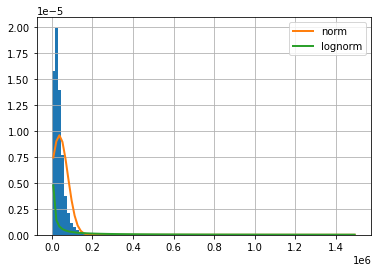

In [17]:
f = Fitter(psid.annlabinc,
           distributions=['lognorm',
                          "norm"])
f.fit()
f.summary()

The labor income distribution is skewed to the right, meaning that a small amount of people will make a lot of money. In order to focus our analysis in the overall population we filter out the 10% highest incomes by selecting the 90th percentile.

In [18]:
q_9 = psid.annlabinc.quantile(0.9)
q_9

70000.0

### What categorical features may have an effect on income?

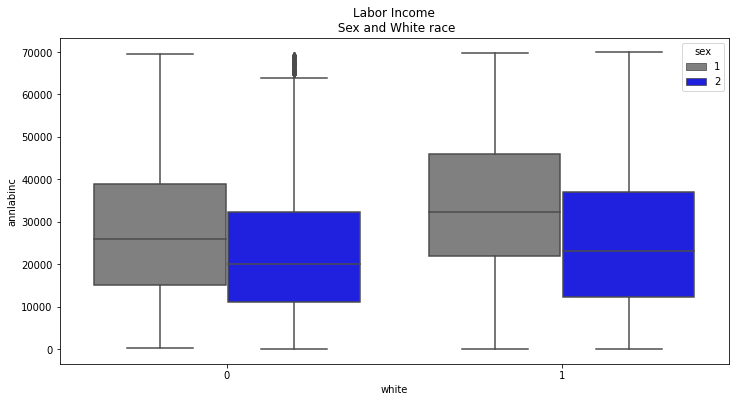

In [29]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set(title="Labor Income\n Sex and White race")
ax = sns.boxplot(x="white", y="annlabinc", hue="sex",
                 data=psid[psid.annlabinc < q_9], 
                 dodge=True, ax = ax, palette=['gray','blue'])

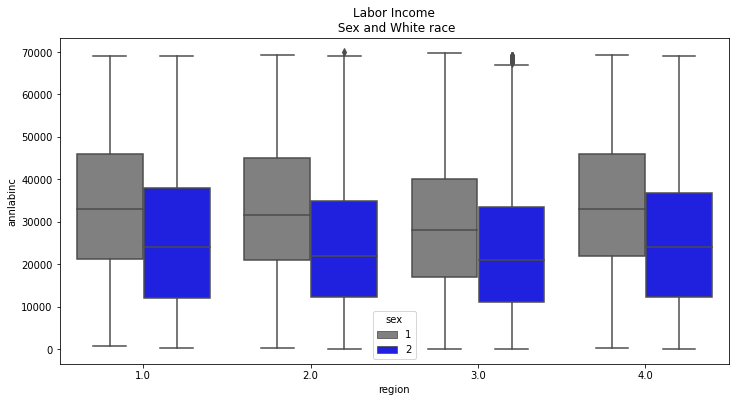

In [28]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set(title="Labor Income\n Sex and White race")
ax = sns.boxplot(x="region", y="annlabinc", hue="sex",
                 data=psid[psid.annlabinc < q_9], 
                 dodge=True, ax = ax, palette=['gray','blue'])

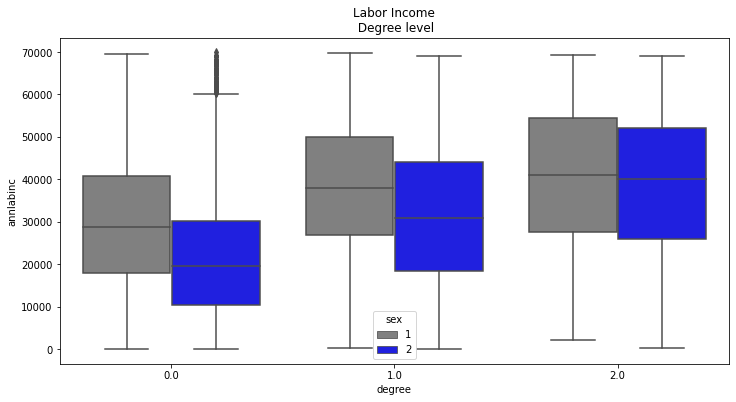

In [34]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set(title="Labor Income\n Degree level")
ax = sns.boxplot(x="degree", y="annlabinc", hue="sex",
                 data=psid[psid.annlabinc < q_9], 
                 dodge=True, ax = ax, palette=['gray','blue'])

Looking into the plot below, we can observe that different from what we would expect we could not identify a clear relationship between age and years of experience with labor income.

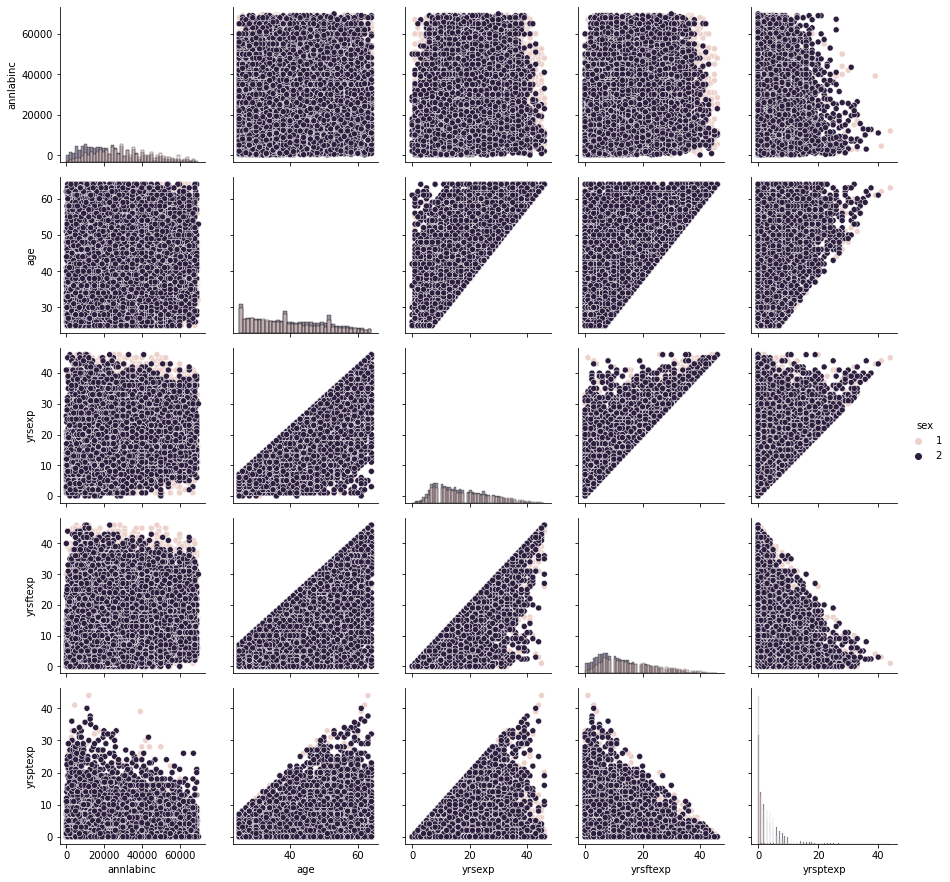

In [38]:
g = sns.PairGrid(psid[psid.annlabinc < q_9][['annlabinc','age','sex','yrsexp','yrsftexp','yrsptexp']], hue="sex")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()